# Dependencies:

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import cv2
import imghdr
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

# Data Fixing

In [3]:
# image_exts = ['jpeg', 'png', 'jpg', 'bmg']
# for type in os.listdir('data'):
#     for image in os.listdir(os.path.join('data',type)):
#         image_path = os.path.join('data',type, image)
#         try:
#             img = cv2.imread(image_path)
#             tip = imghdr.what(image_path)
#             if tip not in image_exts:
#                 print('Image is not in ext list {}'.format(image_path))
#                 os.remove(image_path)
#         except Exception as e:
#             print('Isse with the image {}'.format(image_path))


In [4]:
import numpy as np

In [5]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 618 files belonging to 5 classes.


In [6]:
data_iterator = data.as_numpy_iterator()

In [7]:
batch = data_iterator.next()

In [8]:
batch[0]

array([[[[252.76758   , 252.76758   , 252.76758   ],
         [252.76758   , 252.76758   , 252.76758   ],
         [252.76758   , 252.76758   , 252.76758   ],
         ...,
         [252.76758   , 252.76758   , 252.76758   ],
         [252.        , 252.        , 252.        ],
         [252.10532   , 252.10532   , 252.10532   ]],

        [[253.30273   , 253.30273   , 253.30273   ],
         [253.30273   , 253.30273   , 253.30273   ],
         [253.30273   , 253.30273   , 253.30273   ],
         ...,
         [253.30273   , 253.30273   , 253.30273   ],
         [253.        , 253.        , 253.        ],
         [252.        , 252.        , 252.        ]],

        [[255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         ...,
         [255.        , 255.        , 255.        ],
         [252.35938   , 252.35938   , 252.35938   ],
         [253.        , 253.        , 253.        ]],

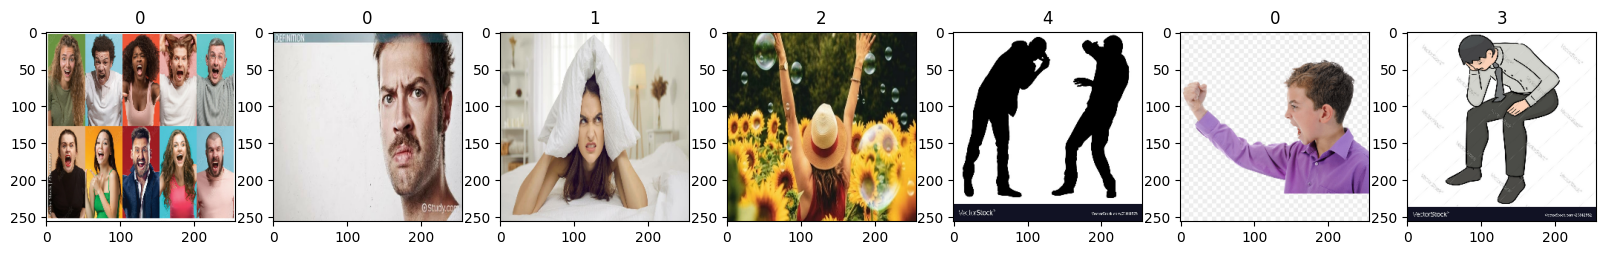

In [9]:
fig, ax = plt.subplots(ncols= 7, figsize=(20,20))

for idx, img in enumerate(batch[0][:7]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])



# Preprocess Data

In [10]:
data = data.map(lambda x, y: (x/255,y))

In [11]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [12]:
len(data)

20

In [13]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [14]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Model Building

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [16]:
model = Sequential([
    Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256,256,3)),
    MaxPooling2D(),
    Conv2D(32, (3,3), 1, activation = 'relu'),
    MaxPooling2D(),
    # Conv2D(16, (3,3), 1, activation = 'relu'),
    # MaxPooling2D(),
    Flatten(),
    Dense(256, activation = 'relu'),
    Dropout(0.3),
    Dense(5, activation = 'softmax')
])

In [17]:
model.compile(optimizer='adam', loss=tf.losses
              .SparseCategoricalCrossentropy(), metrics=['accuracy'])


In [18]:
model.summary()
len(train)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 256)               3

14

# Fitting

In [19]:
hist = model.fit(train, epochs= 10 , validation_data= val)

Epoch 1/10
14/14 [==============================] - 15s 940ms/step - loss: 8.9826 - accuracy: 0.2634 - val_loss: 1.7128 - val_accuracy: 0.3125
Epoch 2/10
14/14 [==============================] - 16s 1s/step - loss: 1.5442 - accuracy: 0.3661 - val_loss: 1.4627 - val_accuracy: 0.3828
Epoch 3/10
14/14 [==============================] - 12s 794ms/step - loss: 1.3739 - accuracy: 0.4621 - val_loss: 1.1849 - val_accuracy: 0.6484
Epoch 4/10
14/14 [==============================] - 12s 788ms/step - loss: 1.1049 - accuracy: 0.6406 - val_loss: 0.8563 - val_accuracy: 0.7812
Epoch 5/10
14/14 [==============================] - 13s 889ms/step - loss: 0.7907 - accuracy: 0.7455 - val_loss: 0.6207 - val_accuracy: 0.8516
Epoch 6/10
14/14 [==============================] - 13s 815ms/step - loss: 0.5749 - accuracy: 0.8214 - val_loss: 0.4836 - val_accuracy: 0.9062
Epoch 7/10
14/14 [==============================] - 13s 890ms/step - loss: 0.3937 - accuracy: 0.9129 - val_loss: 0.2199 - val_accuracy: 0.9453
Ep

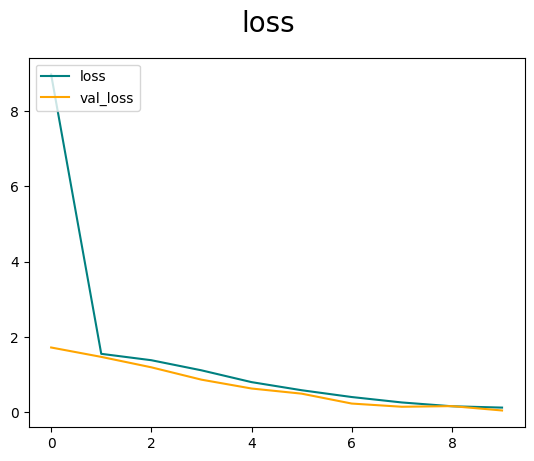

In [20]:
fig = plt.figure()

plt.plot(hist.history['loss'],color = 'teal',label = 'loss' )
plt.plot(hist.history['val_loss'],color = 'orange',label = 'val_loss' )
fig.suptitle('loss', fontsize =20)
plt.legend(loc = 'upper left')
plt.show()

In [21]:
test.as_numpy_iterator().next()[0]

array([[[[0.3372549 , 0.34509805, 0.43529412],
         [0.3372549 , 0.34509805, 0.43529412],
         [0.3372549 , 0.34509805, 0.43529412],
         ...,
         [0.45490196, 0.47058824, 0.5176471 ],
         [0.4509804 , 0.46666667, 0.5137255 ],
         [0.44705883, 0.4627451 , 0.50980395]],

        [[0.3372549 , 0.34509805, 0.43529412],
         [0.3372549 , 0.34509805, 0.43529412],
         [0.3372549 , 0.34509805, 0.43529412],
         ...,
         [0.45490196, 0.47058824, 0.5176471 ],
         [0.4509804 , 0.46666667, 0.5137255 ],
         [0.44705883, 0.4627451 , 0.50980395]],

        [[0.3372549 , 0.34509805, 0.43529412],
         [0.3372549 , 0.34509805, 0.43529412],
         [0.3372549 , 0.34509805, 0.43529412],
         ...,
         [0.45490196, 0.47058824, 0.5176471 ],
         [0.4509804 , 0.46666667, 0.5137255 ],
         [0.44705883, 0.4627451 , 0.50980395]],

        ...,

        [[0.03529412, 0.03529412, 0.03529412],
         [0.03529412, 0.03529412, 0.03529412]

In [22]:
from tensorflow.keras.metrics import Precision, Recall, Accuracy

p  = Precision()
r = Recall()
a = Accuracy()


In [23]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    for j,i in enumerate(yhat):
        i = i.tolist()
        print(i.index(max(i)), y[j])

    # print(yhat[0].index(max(yhat[0])), y)
    

1/1 [==============================] - 0s 165ms/step
4 4
1 1
4 4
0 0
4 4
4 4
1 1
0 0
3 3
4 4
4 4
4 4
2 2
3 3
4 4
1 1
2 2
0 0
2 2
2 2
1 1
4 4
4 4
3 3
0 0
3 3
1 1
4 4
1 1
4 4
4 4
2 2
1/1 [==============================] - 0s 85ms/step
2 2
3 3
0 0
2 2
4 4
0 0
4 4
3 3
2 2
1 1


In [46]:
image_pred = cv2.imread('sad-test.jpeg')

image_resized = cv2.resize(image_pred, (256,256))

In [47]:
image_resized.shape

(256, 256, 3)

In [48]:
image_resized = image_resized/255

In [49]:
image_resized


array([[[0.45098039, 0.42745098, 0.43137255],
        [0.45098039, 0.42745098, 0.43137255],
        [0.45098039, 0.43137255, 0.43137255],
        ...,
        [0.61568627, 0.57647059, 0.62352941],
        [0.61568627, 0.57647059, 0.62352941],
        [0.61568627, 0.57647059, 0.62352941]],

       [[0.45098039, 0.42745098, 0.43137255],
        [0.45098039, 0.42745098, 0.43137255],
        [0.45490196, 0.43137255, 0.43529412],
        ...,
        [0.61568627, 0.57647059, 0.62352941],
        [0.61568627, 0.57647059, 0.62352941],
        [0.61568627, 0.57647059, 0.62352941]],

       [[0.45098039, 0.42745098, 0.43137255],
        [0.45098039, 0.42745098, 0.43137255],
        [0.45490196, 0.43137255, 0.43529412],
        ...,
        [0.61568627, 0.57647059, 0.62352941],
        [0.61568627, 0.57647059, 0.62352941],
        [0.61568627, 0.57647059, 0.62352941]],

       ...,

       [[0.36862745, 0.4       , 0.42745098],
        [0.36862745, 0.4       , 0.42745098],
        [0.37254902, 0

In [50]:

pred = model.predict(np.expand_dims(image_resized,0))

pred = pred.tolist()


1/1 [==============================] - 0s 44ms/step


In [51]:
pred

[[0.017616726458072662,
  0.00023010617587715387,
  0.0056924596428871155,
  0.9565925598144531,
  0.019868148490786552]]

In [52]:
value = pred[0].index(max(pred[0]))
# anger : 0, scared : 4, disgust : 1, happy : 2, sad : 3
emotions = {0 : 'anger' , 4 : 'scared' , 1 : 'disgust' , 2 : 'happy' , 3 : 'sad' }
emotions[value]

'sad'